In [1]:
!nvidia-smi

Thu Apr 11 13:04:53 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 410.73       Driver Version: 410.73       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 760     Off  | 00000000:01:00.0 N/A |                  N/A |
| 39%   43C    P8    N/A /  N/A |     26MiB /  4034MiB |     N/A      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 760     Off  | 00000000:06:00.0 N/A |                  N/A |
| 38%   42C    P8    N/A /  N/A |      1MiB /  4037MiB |     N/A      Default |
+-------------------------------+----------------------+----------------------+
        

In [2]:
# %load cnn_regression-Copy1.py
# USAGE
# python cnn_regression.py --dataset Houses-dataset/Houses\ Dataset/

# import the necessary packages
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from pyimagesearch import models
import numpy as np
import argparse
import locale
import os
import sys
from matplotlib.image import imread
import matplotlib.pyplot as plt
import tensorflow as tf


IMG_WIDTH = 1400
IMG_HEIGHT = 1400
ROW_SLICE = slice(0, 1400)
COL_SLICE = slice(1000, None)


def cut_X(arr, reshape = None):
    x_cut = arr[:,960:1300,600:]
    if reshape:
        if len(x_cut.shape)>3:
            x_cut = x_cut[...,0]
            x_cut_out = x_cut.reshape(x_cut.shape[0],x_cut.shape[1]*x_cut.shape[2])
    else:
        x_cut_out = x_cut
    return x_cut_out


#data_dir = "/storage/yw18581/data/"
data_dir = "/data/uob"
TRAIN_VAL_TEST_DIR = os.path.join(data_dir, "train_validation_test")

N_EPOCHS=200

CHECKPOINT_FOLDER_PATH = os.path.join(data_dir, 'trained_models')
TASK_NAME = 'CNN_regression_pyimage_{}epochs'.format(N_EPOCHS)
TASK_FOLDER_PATH = os.path.join(CHECKPOINT_FOLDER_PATH, TASK_NAME)

if not os.path.exists(TASK_FOLDER_PATH):
    os.makedirs(TASK_FOLDER_PATH)


X_train = np.load(os.path.join(TRAIN_VAL_TEST_DIR,"Xy_train_dataset_2_4_15_25_35.npz"))["y"]
X_val = np.load(os.path.join(TRAIN_VAL_TEST_DIR,"Xy_val_dataset_2_4_15_25_35.npz"))["y"]
X_test = np.load(os.path.join(TRAIN_VAL_TEST_DIR,"Xy_test_dataset_2_4_15_25_35.npz"))["y"]

y_train = np.load(os.path.join(TRAIN_VAL_TEST_DIR,"Xy_train_dataset_2_4_15_25_35.npz"))["dist"]
y_val = np.load(os.path.join(TRAIN_VAL_TEST_DIR,"Xy_val_dataset_2_4_15_25_35.npz"))["dist"]
y_test = np.load(os.path.join(TRAIN_VAL_TEST_DIR,"Xy_test_dataset_2_4_15_25_35.npz"))["dist"]

X_train_cut = cut_X(X_train)
X_val_cut = cut_X(X_val)
X_test_cut = cut_X(X_test)


# find the largest house price in the training set and use it to
# scale our house prices to the range [0, 1] (will lead to better
# training and convergence)
maxDist = np.max(y_train)
print(maxDist)
trainY = y_train/maxDist
valY = y_val/maxDist
testY = y_test/maxDist

# create our Convolutional Neural Network and then compile the model
# using mean absolute percentage error as our loss, implying that we
# seek to minimize the absolute percentage difference between our
# price *predictions* and the *actual prices*

_, width, height, depth,  = X_train_cut.shape

model = models.create_cnn(height,width, depth, regress=True)
opt = Adam(lr=1e-3, decay=1e-3 / N_EPOCHS)
model.compile(loss="mean_absolute_percentage_error", optimizer=opt)
model.summary()

# train the model
print("[INFO] training model...")
model.fit(X_train_cut, trainY, validation_data=(X_val_cut, valY),
	epochs=N_EPOCHS, batch_size=8, verbose=1)




Using TensorFlow backend.


35
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 340, 800, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 340, 800, 16)      160       
_________________________________________________________________
activation_1 (Activation)    (None, 340, 800, 16)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 340, 800, 16)      64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 170, 400, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 170, 400, 32)      4640      
_________________________________________________________________
activation_2 (Activation)    (None, 170, 400, 32)      0         
_______

960/960 [==============================] - 24s 25ms/step - loss: 18.4559 - val_loss: 7.2147
Epoch 126/200
960/960 [==============================] - 24s 25ms/step - loss: 17.4430 - val_loss: 7.4513
Epoch 127/200
960/960 [==============================] - 24s 25ms/step - loss: 16.9113 - val_loss: 8.7197
Epoch 128/200
960/960 [==============================] - 24s 25ms/step - loss: 16.8980 - val_loss: 6.1345
Epoch 129/200
960/960 [==============================] - 24s 25ms/step - loss: 17.5680 - val_loss: 5.8172
Epoch 130/200
960/960 [==============================] - 24s 25ms/step - loss: 16.9841 - val_loss: 5.6501
Epoch 131/200
960/960 [==============================] - 24s 25ms/step - loss: 17.9711 - val_loss: 6.5052
Epoch 132/200
960/960 [==============================] - 24s 25ms/step - loss: 16.6136 - val_loss: 7.3391
Epoch 133/200
960/960 [==============================] - 24s 25ms/step - loss: 18.7065 - val_loss: 6.8209
Epoch 134/200
960/960 [==============================] - 24s

In [4]:
import sys

In [6]:
sys.path.append("../../notebooks/")

In [7]:
from plot_history import plot_history

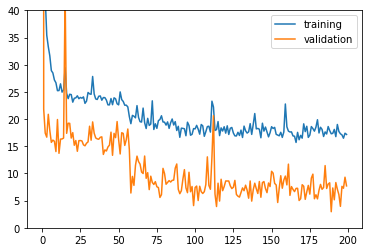

In [12]:
plot_history(model.history, ymin_loss=0,ymax_loss=40)

In [ ]:
model.fit(X_train_cut, trainY, validation_data=(X_val_cut, valY),
	epochs=1000, batch_size=8, verbose=1)

Train on 960 samples, validate on 240 samples
Epoch 1/1000
960/960 [==============================] - 21s 22ms/step - loss: 17.7487 - val_loss: 7.2398
Epoch 2/1000
960/960 [==============================] - 22s 22ms/step - loss: 18.1121 - val_loss: 7.8427
Epoch 3/1000
960/960 [==============================] - 23s 24ms/step - loss: 16.9827 - val_loss: 6.9453
Epoch 4/1000
960/960 [==============================] - 23s 24ms/step - loss: 17.4270 - val_loss: 8.6975
Epoch 5/1000
960/960 [==============================] - 24s 25ms/step - loss: 18.7375 - val_loss: 8.3421
Epoch 6/1000
960/960 [==============================] - 24s 25ms/step - loss: 16.7742 - val_loss: 7.5330
Epoch 7/1000
960/960 [==============================] - 24s 25ms/step - loss: 18.5521 - val_loss: 9.6207
Epoch 8/1000
960/960 [==============================] - 24s 25ms/step - loss: 23.1978 - val_loss: 6.9517
Epoch 9/1000
960/960 [==============================] - 24s 25ms/step - loss: 16.4317 - val_loss: 7.6274
Epoch 10/

In [ ]:
model.s

In [4]:
# make predictions on the testing data
print("[INFO] predicting distances...")
preds = model.predict(X_test_cut)

# compute the difference between the *predicted* house prices and the
# *actual* house prices, then compute the percentage difference and
# the absolute percentage difference
diff = preds.flatten() - testY
percentDiff = (diff / testY) * 100
absPercentDiff = np.abs(percentDiff)
mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)



[INFO] predicting distances...


In [6]:
mean

9.960592955661317

In [7]:
from sklearn.metrics import mean_squared_error

In [8]:
mean_squared_error(preds, y_test)

168.8568395557665

In [ ]:

# compute the mean and standard deviation of the absolute percentage
# difference

# finally, show some statistics on our model
locale.setlocale(locale.LC_ALL, "en_US.UTF-8")
print("[INFO] avg. house price: {}, std house price: {}".format(
	locale.currency(df["price"].mean(), grouping=True),
	locale.currency(df["price"].std(), grouping=True)))
print("[INFO] mean: {:.2f}%, std: {:.2f}%".format(mean, std))